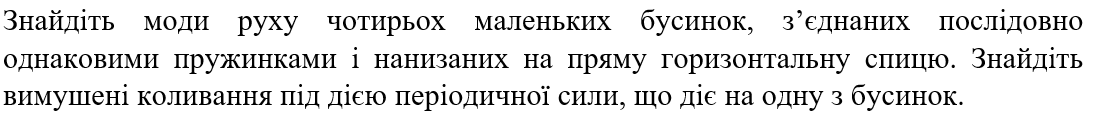

In [1]:
from IPython.display import display, Math, Latex

def disp(ex):
    display(Math(latex(ex)))

def displ(tex):
    display(Math(tex))

In [2]:
t = var("t")
N = 4
x = []
X = []
m = var("m")
v = []
V = []
for i in range(N):
    exec(preparse("X_" + str(i) + " = var(\"x_" + str(i) + "\""")"))
    exec(preparse("V_" + str(i) + " = var(\"v_" + str(i) + "\""")"))
    exec(preparse("x_" + str(i) + " = function(\"x_" + str(i) + "\""")(t)"))
    exec(preparse("v_" + str(i) + " = function(\"v_" + str(i) + "\""")(t)"))
    exec(preparse("x += [x_" + str(i) + "]"))
    exec(preparse("X += [X_" + str(i) + "]"))
    exec(preparse("v += [v_" + str(i) + "]"))
    exec(preparse("V += [V_" + str(i) + "]"))

In [3]:
k = var("k")

In [4]:
T = 0
for i in range(N):
    T += m * x[i].diff(t)^2/2
disp(T)

<IPython.core.display.Math object>

In [5]:
U = 0
for i in range(N-1):
    U += k * (x[i] - x[i+1])^2/2
    
# ring addition to U
U += k * (x[0] - x[N-1])^2/2

disp(U)

<IPython.core.display.Math object>

In [6]:
L = T - U
disp(L)

<IPython.core.display.Math object>

обобщенные импульсы

$P = \frac{\partial L}{\partial \dot{x}} = \frac{\partial L}{\partial {v}}$

In [7]:
p = []
P = []
for i in range(N):
    p += [L.subs(x[i].diff(t) == V[i]).diff(V[i]).subs(V[i] == x[i].diff(t))]
    P += [L.subs(x[i].diff(t) == V[i]).diff(V[i]).subs(V[i] == v[i])]
disp(P)
disp(p)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Запишем уравнения Эйлера-Лагранжа

$\frac{d}{dt}\frac{\partial L}{\partial \dot{x}} - \frac{\partial L}{\partial {x}} = 0$

In [8]:
# система уравнений Эйлера-Лагранжа
eqs = []
for i in range(N):
    eqs += [p[i].diff(t) - L.subs(x[i] == X[i]).diff(X[i]).subs(X[i] == x[i]).expand() == 0]
    disp(eqs[i])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Выразим энергию через Лагранжиан

$E = \Sigma_{i}^{} \frac {\partial L}{\partial \dot{q}_i} \frac {q_i}{dt} - L$

In [9]:
eqs2 = []
for i in range(N):
    eqs2 += [x[i].diff(t) == V[i]]
    disp(eqs2[i])

for i in range(N):
    eqs2 += [(P[i].diff(t) == L.subs(x[i] == X[i]).diff(X[i]).expand())/m]
    for j in range(N):
        eqs2[i+N] = eqs2[i+N].subs(x[j] == X[j])
    disp(eqs2[i+N])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
des = [de_i.rhs() for de_i in eqs2]
disp(des)

<IPython.core.display.Math object>

In [11]:
values = [
    k == 1,
    m == 1,
]

In [12]:
# делаем подстановку численных значений
f = [de_i.subs(values) for de_i in des]
disp(f)

<IPython.core.display.Math object>

In [13]:
# Solve numerically a system of first-order ordinary differential equations
# using odeint from scipy.integrate module.

# des – right hand sides of the system
# ics – initial conditions
# times – a sequence of time points in which the solution must be found
# dvars – dependent variables. ATTENTION: the order must be the same as in des, that means: d(dvars[i])/dt=des[i]
# ivar – independent variable, optional.

times = srange(0, 24.4, 0.01)

x0 = 0.1
dvars = X+V
ics=[0 for i in range(2*N)]
ics[N-1] = 0.1

sol = desolve_odeint(des=f, ics=ics, times=times, dvars=dvars, ivar=t)

In [14]:
colors = ["red", "green", "yellow", "blue", "pink", "brown"]

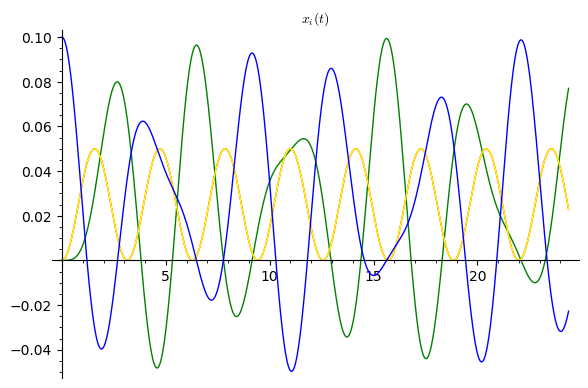

In [15]:
p = Graphics()
for i in range(N):
    p += line(zip(times,sol[:,i]), color=colors[i])
p.show(title="$x_i(t)$")

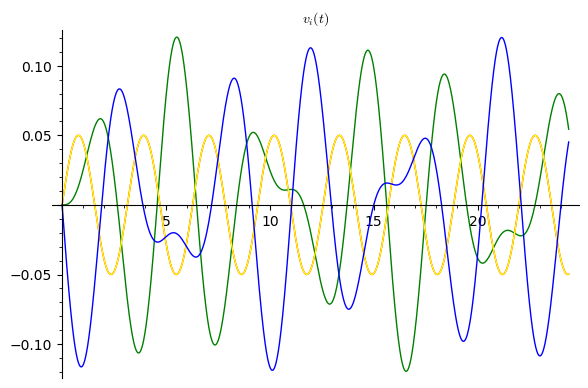

In [16]:
p = Graphics()
for i in range(N):
    p += line(zip(times,sol[:,i+N]), color=colors[i])
p.show(title="$v_i(t)$")

In [17]:
A = []
omega = var("omega")

for i in range(N):
    exec(preparse("A_" + str(i) + " = var(\"A_" + str(i) + "\""")"))
    exec(preparse("A   += [A_"  + str(i) + "]"))

In [18]:
# решение системы уравнений Эйлера-Лагранжа
# ищем в виде
xi = []
for i in range(N):
    xi += [A[i]*exp(I*omega*t)]
    disp(xi[i])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [19]:
# подставляя решения в систему
# уравнений Эйлера Лагранжа
# получаем систему линейных алгебраичных уравнений
eqsi = []
for i in range(N):
    eq_i = eqs[i].substitute_function(x[i] == xi[i])
    for j in range(N):
        eq_i = eq_i.subs(x[j] == xi[j])
        
    eqsi += [ eq_i ]
    disp(eqsi[i])

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [20]:
def GenerateMatrix(equsys, vars):
    A=matrix(SR, [[(equ.lhs() - equ.rhs()).coefficient(v) for v in vars] for equ in equsys])
    return A

In [21]:
M = GenerateMatrix(eqsi, A)
disp(M)

<IPython.core.display.Math object>

In [22]:
disp(xi)

<IPython.core.display.Math object>

In [23]:
M = GenerateMatrix(eqsi, xi)
disp(M)

<IPython.core.display.Math object>

In [24]:
det_M = M.det()
disp(det_M)

<IPython.core.display.Math object>

In [25]:
disp(det_M.factor())

<IPython.core.display.Math object>

In [26]:
sol_omega = solve(det_M == 0, omega)
for sol_omega_i in sol_omega:
    disp(sol_omega_i)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [27]:
values = [
    m == 1.0,
    k == 1.0,
]

In [28]:
for sol_omega_i in sol_omega:
    disp(sol_omega_i.subs(values))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

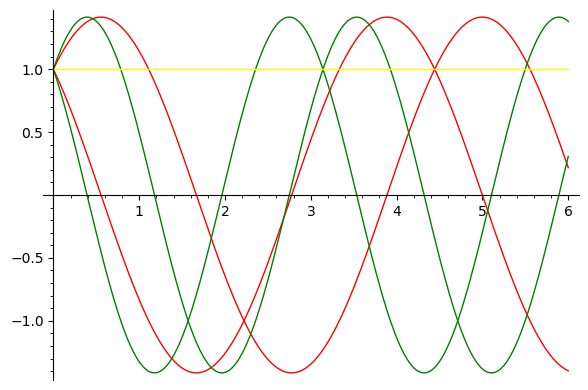

In [29]:
p = Graphics()
i = 0
for sol_omega_i in sol_omega:
    p += plot((cos(omega*t)+sin(omega*t)).subs(sol_omega_i.subs(values)), t, 0, 6, color=colors[i//2])
    
    i = i + 1
p.show()


using the following found frequency


<IPython.core.display.Math object>

we have the following system for amplitude coefficients


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

with  0  determinant:


<IPython.core.display.Math object>

rank of this system is:


<IPython.core.display.Math object>

so I can eleminate 4  -  2  =  2 equations


<IPython.core.display.Math object>

And the solution for frequency omega == -sqrt(2)*sqrt(k/m) is:


<IPython.core.display.Math object>

assuming that r2 is  1  we have:
assuming that r1 is  3  we have:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

and the mode motion is:


<IPython.core.display.Math object>

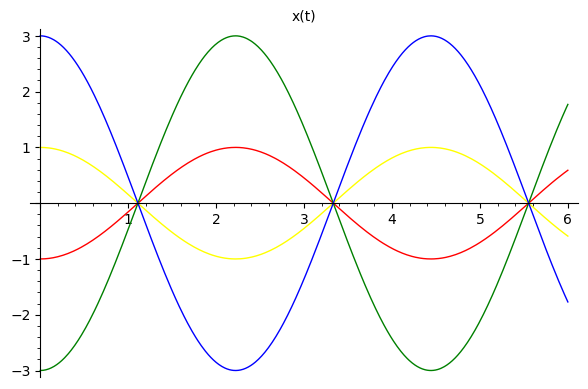

Animation with 100 frames
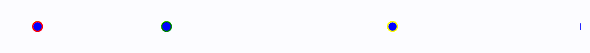


using the following found frequency


<IPython.core.display.Math object>

we have the following system for amplitude coefficients


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

with  0  determinant:


<IPython.core.display.Math object>

rank of this system is:


<IPython.core.display.Math object>

so I can eleminate 4  -  2  =  2 equations


<IPython.core.display.Math object>

And the solution for frequency omega == sqrt(2)*sqrt(k/m) is:


<IPython.core.display.Math object>

assuming that r4 is  1  we have:
assuming that r3 is  3  we have:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

and the mode motion is:


<IPython.core.display.Math object>

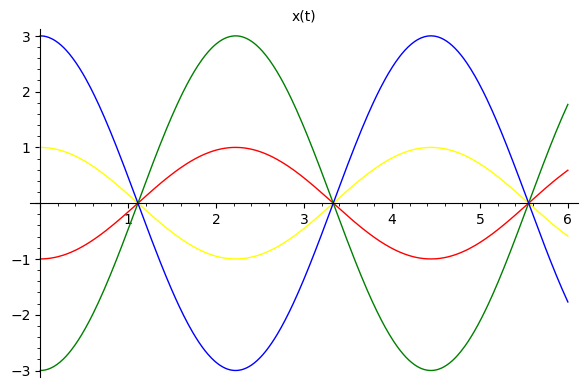

Animation with 100 frames
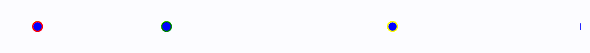


using the following found frequency


<IPython.core.display.Math object>

we have the following system for amplitude coefficients


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

with  0  determinant:


<IPython.core.display.Math object>

rank of this system is:


<IPython.core.display.Math object>

so I can eleminate 4  -  3  =  1 equations


<IPython.core.display.Math object>

And the solution for frequency omega == -2*sqrt(k/m) is:


<IPython.core.display.Math object>

assuming that r5 is  1  we have:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

and the mode motion is:


<IPython.core.display.Math object>

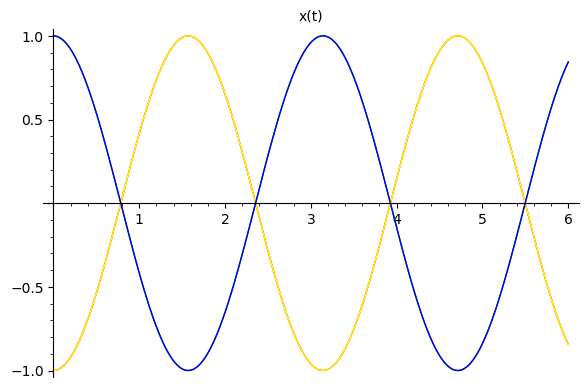

Animation with 100 frames
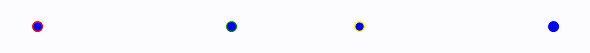


using the following found frequency


<IPython.core.display.Math object>

we have the following system for amplitude coefficients


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

with  0  determinant:


<IPython.core.display.Math object>

rank of this system is:


<IPython.core.display.Math object>

so I can eleminate 4  -  3  =  1 equations


<IPython.core.display.Math object>

And the solution for frequency omega == 2*sqrt(k/m) is:


<IPython.core.display.Math object>

assuming that r6 is  1  we have:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

and the mode motion is:


<IPython.core.display.Math object>

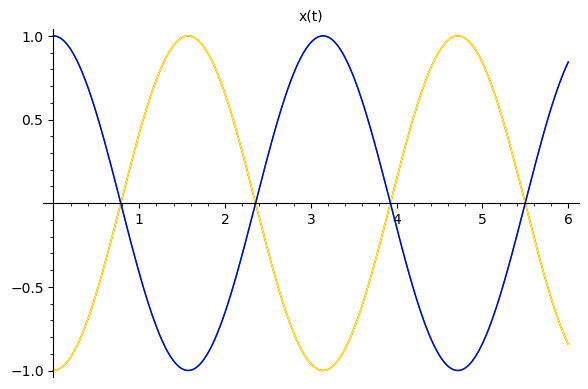

Animation with 100 frames
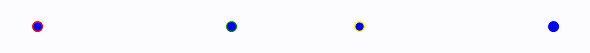


using the following found frequency


<IPython.core.display.Math object>

we have the following system for amplitude coefficients


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

with  0  determinant:


<IPython.core.display.Math object>

rank of this system is:


<IPython.core.display.Math object>

so I can eleminate 4  -  3  =  1 equations


<IPython.core.display.Math object>

And the solution for frequency omega == 0 is:


<IPython.core.display.Math object>

assuming that r7 is  1  we have:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

and the mode motion is:


<IPython.core.display.Math object>

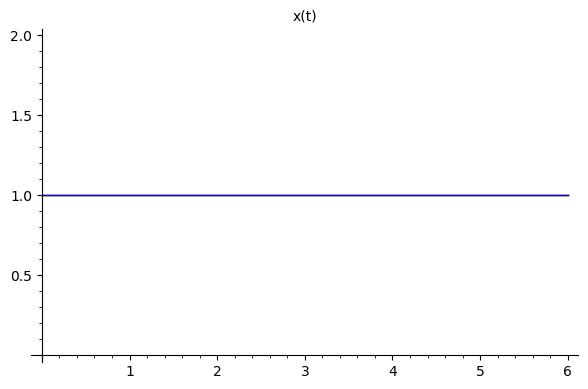

In [ ]:
for sol_omega_i in sol_omega:
    print("")
    # решение системы уравнений Эйлера-Лагранжа в виде
    x_i = []
    for i in range(N):
        # с найденными выше частотами мод
        x_i += [A[i]*exp(I*sol_omega_i.rhs()*t)]
    print("using the following found frequency")
    disp(sol_omega_i)

    # подставляем решения в систему
    # уравнений Эйлера Лагранжа
    # получаем систему линейных алгебраичных уравнений
    # для коэффициентов A
    print("we have the following system for amplitude coefficients")
    eqs_i = []
    for i in range(N):
        eq_i = eqs[i].substitute_function(x[i] == x_i[i])
        for j in range(N):
            eq_i = eq_i.subs(x[j] == x_i[j])
        
        eq_i = (eq_i / exp(I*sol_omega_i.rhs()*t) / k).full_simplify()

        eqs_i += [ eq_i ]
        disp(eqs_i[i])

    M = GenerateMatrix(eqs_i, A)
    det_M = M.det()
    disp(det_M)
    print("with ", det_M, " determinant:")
    disp(M)

    print("rank of this system is:")
    rank_M = M.rank()
    disp(rank_M)
    
    n_eleminations = N - rank_M
    
    print("so I can eleminate", N, " - ", rank_M, " = ", n_eleminations, "equations")
    eqs_A = []
    for i in range(rank_M):
        eqs_A += [eqs_i[i]]
    disp(eqs_A)
    
    print("And the solution for frequency", sol_omega_i,"is:")
    sol_A = solve(eqs_A, A)
    disp(sol_A)

    sol_A_independed_variables = []
    for j in range(n_eleminations):
        sol_A_variables = sol_A[0][j].variables()
        for sol_A_variable in sol_A_variables:
            if sol_A_variable not in A:
                sol_A_independed_variables += [sol_A_variable]
        
    sol_A_independed_variables_assumings = []
    for j in range(n_eleminations):
        sol_A_independed_variables_assumings += [2*j+1]
        print("assuming that", sol_A_independed_variables[j], "is ", sol_A_independed_variables_assumings[j]," we have:")
    
    for sol_A_i in sol_A[0]:
        sol_A_i_assumed = sol_A_i
        for j in range(n_eleminations):
            sol_A_i_assumed = sol_A_i_assumed.subs(sol_A_independed_variables[j] == sol_A_independed_variables_assumings[j])
        disp(sol_A_i_assumed)

    x_i_sol = []
    for i in range(N):
        # с найденными выше частотами мод
        x_i_sol += [x_i[i]]
        for sol_A_i in sol_A[0]:
            sol_A_i_assumed = sol_A_i
            for j in range(n_eleminations):
                sol_A_i_assumed = sol_A_i_assumed.subs(sol_A_independed_variables[j] == sol_A_independed_variables_assumings[j])
            x_i_sol[i] = x_i_sol[i].subs(sol_A_i_assumed)

    print("and the mode motion is:")
    disp(x_i_sol)
    
    p = Graphics()
    i = 0
    for x_i_sol_i in x_i_sol:
        p += plot((x_i_sol_i).subs(values).real(), t, 0, 6, color = colors[i])
        i = i + 1
    p.show(title="x(t)")
    
    frames = []
    import numpy as np
    for t_i in np.arange(0, 10, 0.1):
        p = Graphics()
        i = 0
        for x_i_sol_i in x_i_sol:
            x_t_i = 10*i + (x_i_sol_i).subs(values, t = t_i).real().n()
            #print("i", i, "t_i", t_i, "x_t_i", x_t_i, colors[i])
            p += point([x_t_i, 0], marker='o', markeredgecolor=colors[i], size=50)
            i = i + 1
        frames += [p]

    a = animate(frames, aspect_ratio=1, axes=False, xmin = -2, xmax = +32, ymin=-1, ymax=1)
    a.show(use_ffmpeg=True)